#Import Dependencies





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from re import T
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import joblib

#Data Extraction & Analysis


In [2]:
Insurance_data=pd.read_csv("insurance.csv")
Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
Insurance_data.shape

(1338, 7)

In [4]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
Insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#Univariate Analysis


In [7]:
np.mean(Insurance_data['age'])

39.20702541106129

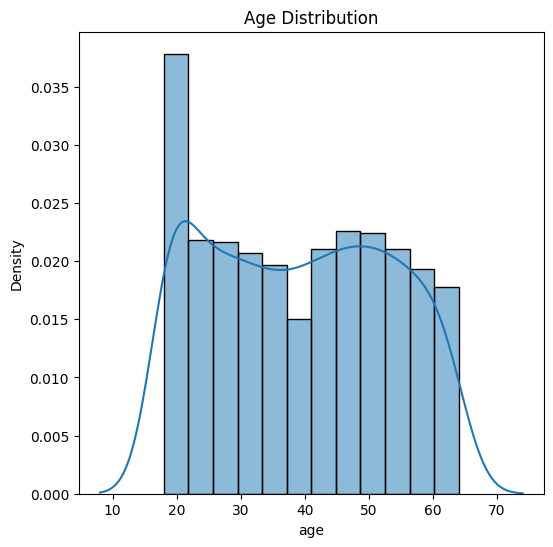

In [8]:
plt.figure(figsize=(6,6))
sns.histplot(Insurance_data['age'],kde=True,stat="density", kde_kws=dict(cut=3))
plt.title('Age Distribution')
plt.show()

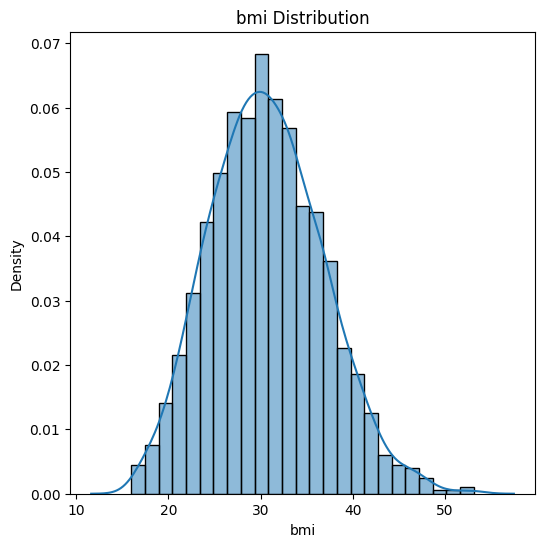

In [9]:
plt.figure(figsize=(6,6))
sns.histplot(Insurance_data['bmi'],kde=True,stat="density", kde_kws=dict(cut=3))
plt.title('bmi Distribution')
plt.show()

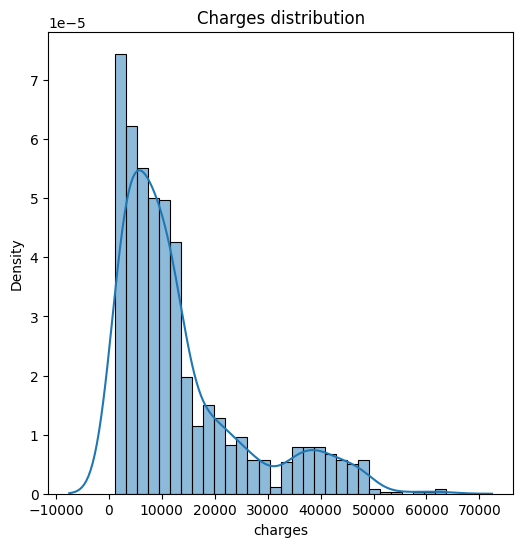

In [10]:
plt.figure(figsize=(6,6))
sns.histplot(Insurance_data['charges'],kde=True,stat="density", kde_kws=dict(cut=3))
plt.title("Charges distribution")
plt.show()

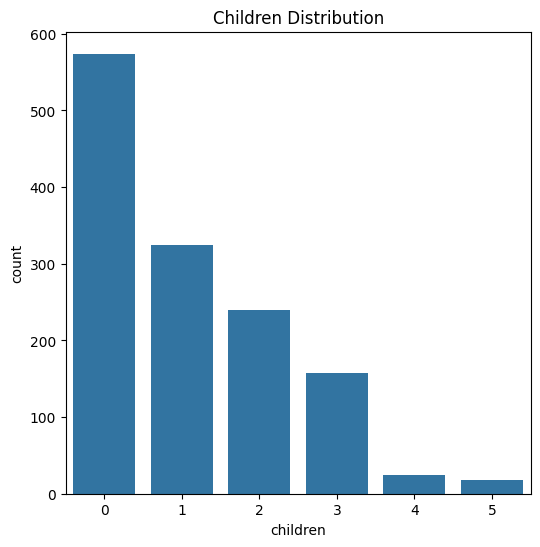

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurance_data)
plt.title('Children Distribution')
plt.show()

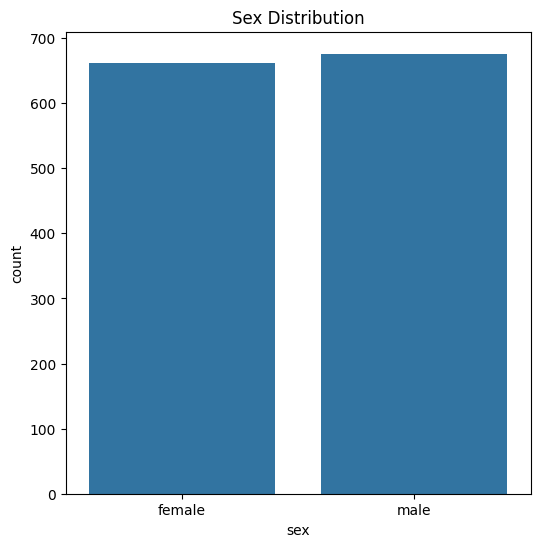

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=Insurance_data)
plt.title('Sex Distribution')
plt.show()

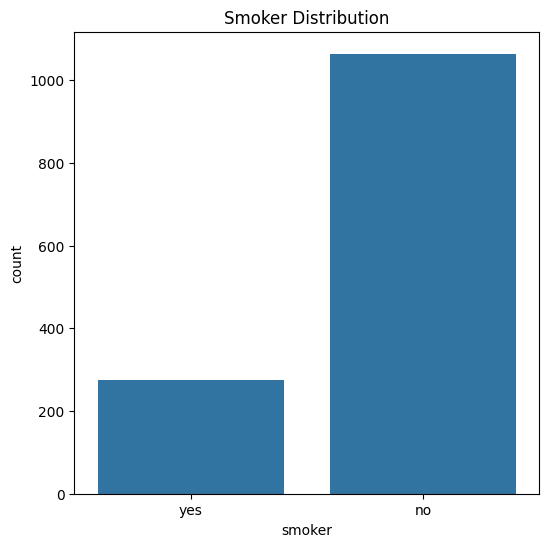

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insurance_data)
plt.title('Smoker Distribution')
plt.show()

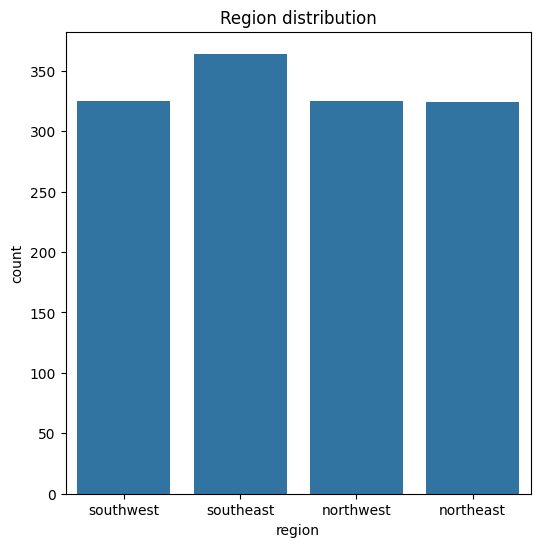

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insurance_data)
plt.title('Region distribution')
plt.show()

#Data Preprocessing

In [15]:
categories=['sex','smoker','region']
le=LabelEncoder()
for value in categories:
  Insurance_data[value]=le.fit_transform(Insurance_data[value])


In [16]:
Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


#Multivariate Analysis

<Axes: >

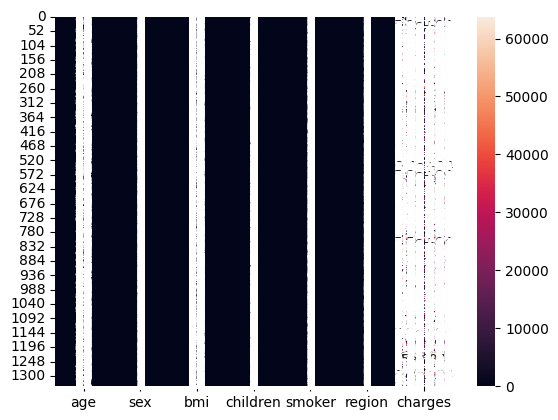

In [17]:
sns.heatmap(Insurance_data,annot=True)

#Data Splitting

In [18]:
x=Insurance_data.iloc[:,:-1]
y=Insurance_data.iloc[:,-1]

In [35]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [20]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [22]:
x_train.shape,x_test.shape

((1070, 6), (268, 6))

In [23]:
y_train.shape,y_test.shape

((1070,), (268,))

#Model Training

In [24]:
regressor=LinearRegression()

In [25]:
regressor.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred_test=regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

#Model Evaluation

In [27]:
r2_train=r2_score(y_train,y_pred_train)
print(r2_train)

0.7475615631933097


In [28]:
r2_test=r2_score(y_test,y_pred_test)
print(r2_test)

0.7623224022563388


#Cross Validation

In [29]:
scores=cross_val_score(regressor,x_train,y_train,cv=5)
print(scores)

[0.70795452 0.76021054 0.71034167 0.74129373 0.7923804 ]


In [30]:
len(x_train.columns)

6

#Hyperparameter Tuning

In [31]:
hyper_params=[{'n_features_to_select':list(range(1,7))}]
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
rfe=RFE(regressor)
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)
model_cv.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6]}],
             return_train_score=True, scoring='r2', verbose=1)

In [32]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009129,0.001205,0.001733,0.000372,1,{'n_features_to_select': 1},0.556321,0.650033,0.661752,0.565172,...,0.615107,0.044904,6,0.633960,0.611950,0.608940,0.634578,0.615653,0.621016,0.011029
1,0.007846,0.000381,0.001666,0.000260,2,{'n_features_to_select': 2},0.559687,0.649666,0.662652,0.563348,...,0.627427,0.056496,5,0.635760,0.614675,0.611366,0.637533,0.645316,0.628930,0.013423
2,0.006725,0.000473,0.001718,0.000339,3,{'n_features_to_select': 3},0.559080,0.647048,0.659819,0.602181,...,0.635170,0.050775,4,0.635854,0.615090,0.611678,0.672699,0.646424,0.636349,0.022288
3,0.006370,0.001497,0.001706,0.000214,4,{'n_features_to_select': 4},0.565819,0.673539,0.698481,0.603268,...,0.650022,0.055957,3,0.677370,0.653639,0.648025,0.673664,0.647345,0.660009,0.012903
4,0.004043,0.000218,0.001627,0.000117,5,{'n_features_to_select': 5},0.653245,0.675818,0.792875,0.695052,...,0.723651,0.061448,2,0.765709,0.654197,0.734464,0.760296,0.734095,0.729752,0.039939
5,0.002701,0.000062,0.001605,0.000101,6,{'n_features_to_select': 6},0.656187,0.756382,0.793130,0.695267,...,0.740479,0.056372,1,0.766007,0.744198,0.734517,0.760305,0.734098,0.747825,0.013153


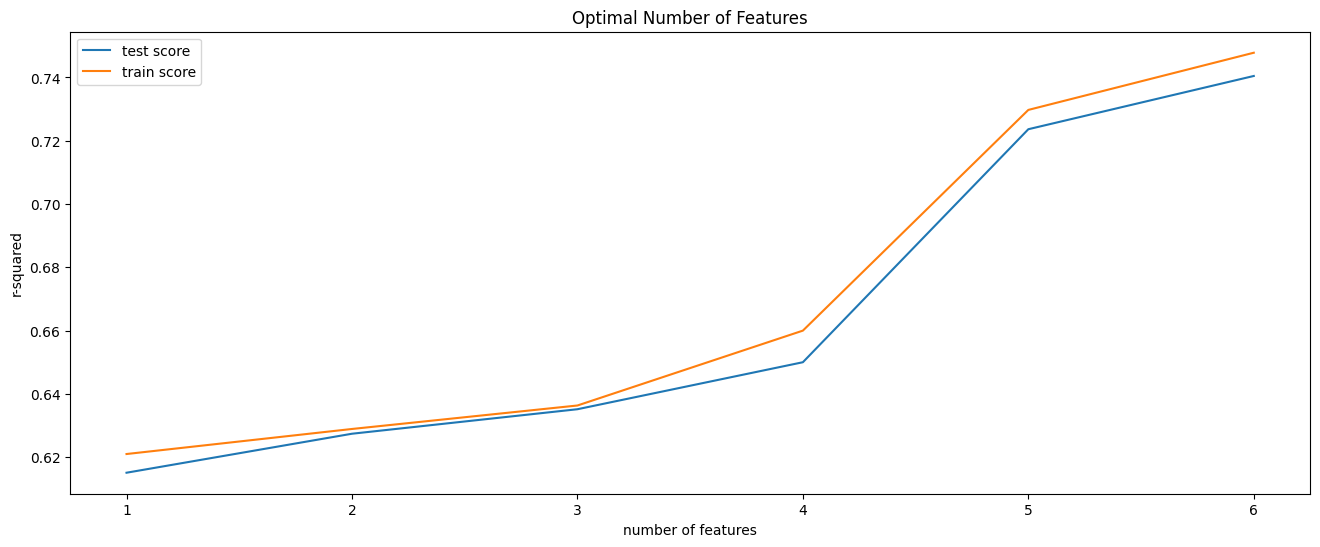

In [33]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [34]:
joblib.dump(regressor,'LinearRegression.pkl')

['LinearRegression.pkl']

#Conclusion

In this project we analyze the insurance cost estimation using linear regression and achieve r2_score is 76% and also analyze the result using cross validation and hyperparameter tuning.